<a href="https://colab.research.google.com/github/sajede-jfr/AMl-Coursework/blob/main/Copy_of_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EEEM068 COURSWORK

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri May 19 14:37:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## Dataset

In [ ]:
%cd /content/AMLproject
!pip install -U --no-cache-dir gdown --pre
!gdown --no-cookies 12iYYEF81xzxtKe0LmxoLc3Q4UD-aGveG
!unzip  Places2_simp.zip


Streaming output truncated to the last 5000 lines.
  inflating: Places2_simp/phone_booth/00000428.jpg  
  inflating: Places2_simp/phone_booth/00000400.jpg  
  inflating: Places2_simp/phone_booth/00000366.jpg  
  inflating: Places2_simp/phone_booth/00000372.jpg  
  inflating: Places2_simp/phone_booth/00000414.jpg  
  inflating: Places2_simp/phone_booth/00000399.jpg  
  inflating: Places2_simp/phone_booth/00000158.jpg  
  inflating: Places2_simp/phone_booth/00000164.jpg  
  inflating: Places2_simp/phone_booth/00000602.jpg  
  inflating: Places2_simp/phone_booth/00000616.jpg  
  inflating: Places2_simp/phone_booth/00000170.jpg  
  inflating: Places2_simp/phone_booth/00000825.jpg  
  inflating: Places2_simp/phone_booth/00000831.jpg  
  inflating: Places2_simp/phone_booth/00000819.jpg  
  inflating: Places2_simp/phone_booth/00000992.jpg  
  inflating: Places2_simp/phone_booth/00000986.jpg  
  inflating: Places2_simp/phone_booth/00000038.jpg  
  inflating: Places2_simp/phone_booth/00000010.j

## Tensor Board




In [ ]:
%load_ext tensorboard



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
!rm -r /content/AMLproject/Places2_simp/.ipynb_checkpoints


rm: cannot remove '/content/AMLproject/Places2_simp/.ipynb_checkpoints': No such file or directory


## Main

In [ ]:
%cd /content/drive/MyDrive/AMLproject
%matplotlib inline
!python Main.py
%tensorboard --logdir runs

/content/drive/MyDrive/AMLproject
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/compat/__init__.py", line 42, in tf
ImportError: cannot import name 'notf' from 'tensorboard.compat' (/usr/local/lib/python3.10/dist-packages/tensorboard/compat/__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/drive/MyDrive/AMLproject/Main.py", line 13, in <module>
    from torch.utils.tensorboard import SummaryWriter
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py", line 12, in <module>
    from .writer import FileWriter, SummaryWriter  # noqa: F401
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/writer.py", line 16, in <module>
    from ._embedding import (
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/_embedding.py", line 9, in <module>
    _HAS_GFILE_JOIN = hasattr(tf.io.gfile, "join")


Launching TensorBoard...

KeyboardInterrupt: ignored

## Acc & Loss Graph

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


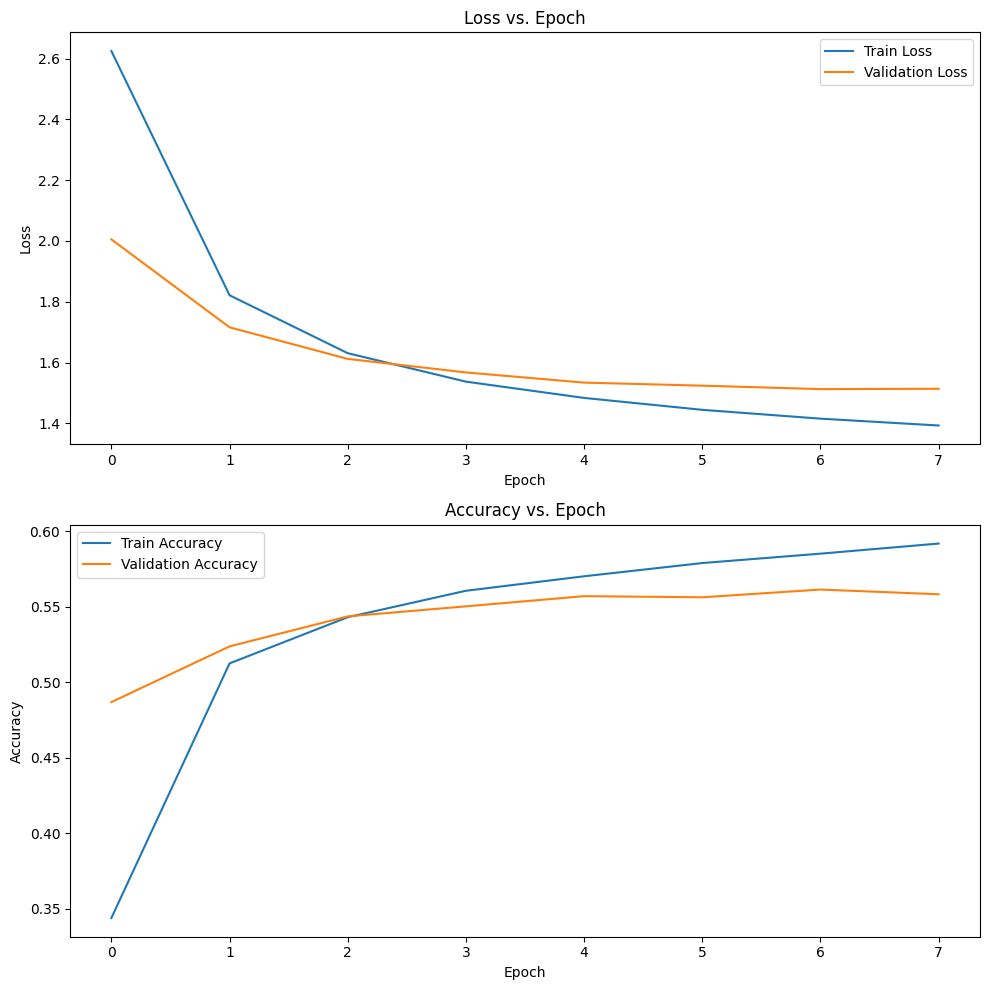

In [ ]:
from tensorboard.backend.event_processing import event_accumulator

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Load the TensorBoard notebook extension
%load_ext tensorboard

# The directory that contains the TensorBoard logs
ea = event_accumulator.EventAccumulator(logdir)
ea.Reload()

# Get data for training and validation loss
train_loss_events = ea.Scalars('train epoch loss')
val_loss_events = ea.Scalars('validation epoch loss')

# Get data for training and validation accuracy
train_acc_events = ea.Scalars('train epoch accuracy')
val_acc_events = ea.Scalars('validation epoch accuracy')

# Extract wall times, step numbers, and values for loss
wall_times_train_loss, step_nums_train_loss, vals_train_loss = zip(*[(e.wall_time, e.step, e.value) for e in train_loss_events])
wall_times_val_loss, step_nums_val_loss, vals_val_loss = zip(*[(e.wall_time, e.step, e.value) for e in val_loss_events])

# Extract wall times, step numbers, and values for accuracy
wall_times_train_acc, step_nums_train_acc, vals_train_acc = zip(*[(e.wall_time, e.step, e.value) for e in train_acc_events])
wall_times_val_acc, step_nums_val_acc, vals_val_acc = zip(*[(e.wall_time, e.step, e.value) for e in val_acc_events])

# Create a figure and plot the training and validation loss
fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].plot(step_nums_train_loss, vals_train_loss, label='Train Loss')
ax[0].plot(step_nums_val_loss, vals_val_loss, label='Validation Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss vs. Epoch')

ax[1].plot(step_nums_train_acc, vals_train_acc, label='Train Accuracy')
ax[1].plot(step_nums_val_acc, vals_val_acc, label='Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy vs. Epoch')

plt.tight_layout()

# Save the figure
fig.savefig('loss_and_accuracy_plot.png')



##Mount the drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
